
=== Standard Linear Regression Parameters ===
Weight (m): 52.743426614647376
Bias (b): 2545.7158438235733

=== Mean Squared Error (Standard Regression) ===
MSE: 110.43783964770469

=== Ridge Regression Parameters ===
Weight (m): 47.627963689867656
Bias (b): -0.39491310131103347

=== Mean Squared Error (Ridge Regression) ===
MSE: 122.25192458133186


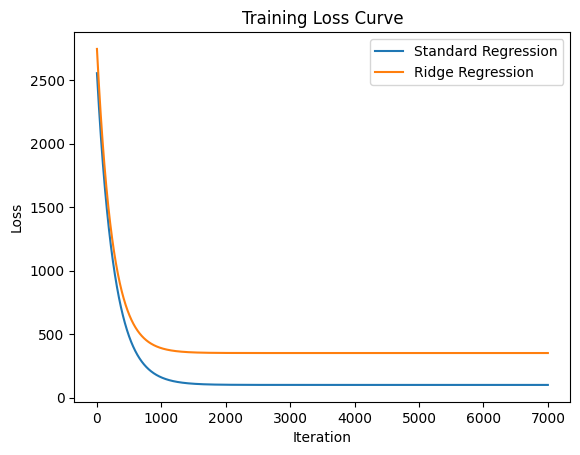


=== Closed-form Ridge Regression Parameters ===
Weight (m): 52.7359879269174
Bias (b): -0.33386296536821425

=== Mean Squared Error (Closed-form Ridge Regression) ===
MSE: 110.41538156212286

=== Predictive Distribution ===
Predictive Mean (first 5 values): [-4.14954578e+01  5.30995030e+01 -4.44617126e+01 -1.74810827e+01
 -7.58773974e-01 -8.11955639e+01 -3.29088240e+00 -5.80019447e+01
  7.73891505e+01  2.24713553e+01  9.33233298e+01 -4.12884106e+01
  7.00244890e+01 -4.62959966e+00 -4.05815349e+01  5.32551045e+01
  5.76111819e+01 -3.78064207e+01 -2.15898839e+01 -7.37689310e+00
 -4.81557659e+01  2.27663919e+01 -1.14736237e+01 -1.10427636e+02
 -1.40260565e+01 -2.95717778e+01  3.70122251e+01 -7.56248186e+01
  5.62647153e+01  6.98198437e+00 -7.32854972e+01 -8.22790900e+01
 -2.52140788e+01 -1.51071681e+01  1.15291520e+01 -6.78392865e+01
 -2.29916854e+01 -3.04837261e+01  2.13196296e+01 -9.24269191e+01
 -1.20400175e+01  2.66837855e+01 -2.67087376e+01  3.34206639e-01
  1.06354034e+01  1.158562

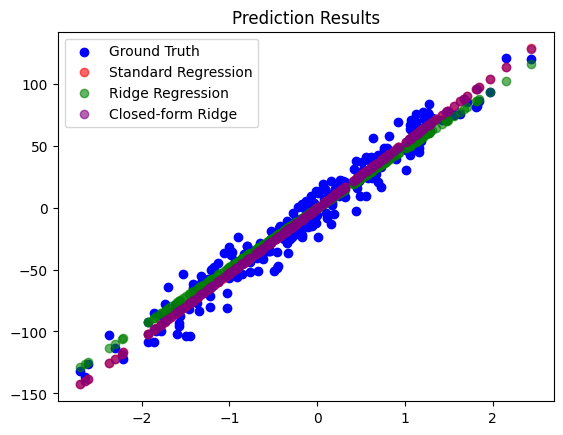

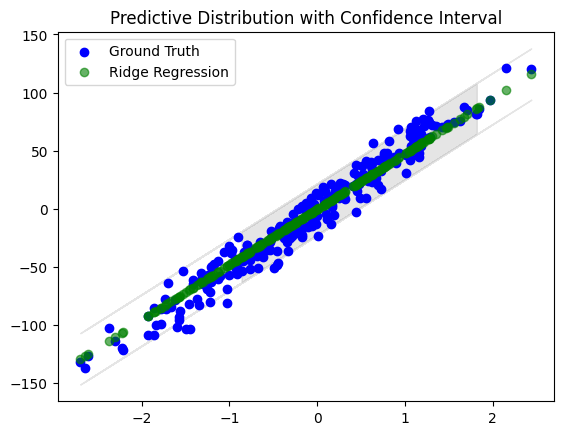

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

# Reshape targets
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Add bias term (column of ones)
train_data = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
test_data = np.hstack((x_test, np.ones((x_test.shape[0], 1))))

# ==============================
# Task 1: Standard Linear Regression (Gradient Descent)
# ==============================
def linear_regression_train(x_train, y_train, lr=1e-3, iterations=7000):
    weight = np.random.randn(2)
    loss = np.zeros(iterations)

    for i in range(iterations):
        y_pred = x_train @ weight  # Compute predicted values

        loss[i] = np.mean((y_train - y_pred) ** 2)  # Compute MSE

        # Compute gradients
        m_gradient, b_gradient= -2 * x_train.T @ (y_train - y_pred) / len(y_train)  # Compute gradient for weight
        # b_gradient = None  # Compute gradient for bias

        # Update weights
        weight[0] -= lr * m_gradient  # Apply gradient descent for weight
        weight[1] -= lr * b_gradient  # Apply gradient descent for bias

    return weight, loss

weight_standard, loss_standard = linear_regression_train(train_data, y_train)

print("\n=== Standard Linear Regression Parameters ===")
print(f'Weight (m): {weight_standard[0]}')  # Print weight[0]
print(f'Bias (b): {loss_standard[1]}')  # Print weight[1]

# ==============================
# Task 2: Compute MSE
# ==============================
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)  # Compute MSE formula

y_pred_standard = test_data @ weight_standard  # Compute predictions for test data
mse_standard = compute_mse(y_test, y_pred_standard)

print("\n=== Mean Squared Error (Standard Regression) ===")
print(f'MSE: {mse_standard}')

# ==============================
# Task 3: Ridge Regression (Gradient Descent)
# ==============================
def ridge_regression_train(x_train, y_train, lr=1e-3, iterations=7000, lambda_reg=0.1):
    weight = np.random.randn(2)
    loss = np.zeros(iterations)

    for i in range(iterations):
        y_pred = x_train @ weight  # Compute predicted values

        loss[i] = np.mean((y_train - y_pred) ** 2) + lambda_reg * np.sum(weight ** 2)  # Compute MSE with regularization term

        # Compute gradients with regularization
        m_gradient, b_gradient = -2 * x_train.T @ (y_train - y_pred) / len(y_train) + 2 * lambda_reg * weight  # Compute weight gradient with regularization
        # b_gradient = None  # Compute bias gradient

        # Update weights
        weight[0] -= lr * m_gradient  # Apply gradient descent for weight
        weight[1] -= lr * b_gradient  # Apply gradient descent for bias

    return weight, loss

weight_ridge, loss_ridge = ridge_regression_train(train_data, y_train)

print("\n=== Ridge Regression Parameters ===")
print(f'Weight (m): {weight_ridge[0]}')
print(f'Bias (b): {weight_ridge[1]}')

y_pred_ridge = test_data @ weight_ridge  # Compute predictions for test data
mse_ridge = compute_mse(y_test, y_pred_ridge)

print("\n=== Mean Squared Error (Ridge Regression) ===")
print(f'MSE: {mse_ridge}')

# ==============================
# Task 4: Plot Loss Curve
# ==============================
plt.plot(loss_standard, label="Standard Regression")  # Plot loss_standard
plt.plot(loss_ridge, label="Ridge Regression")  # Plot loss_ridge
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curve")
plt.show()


# ==============================
# Task 5: Closed-form Ridge Regression
# ==============================
def closed_form_ridge(x_train, y_train, lambda_reg=0.1):
    I = np.eye(x_train.shape[1])
    w_closed_form = np.linalg.inv(x_train.T @ x_train + lambda_reg * I) @ x_train.T @ y_train  # Compute closed-form solution (Equation 4.27)
    return w_closed_form

weight_closed_form = closed_form_ridge(train_data, y_train)
y_pred_closed_form = test_data @ weight_closed_form  # Compute predictions for test data
mse_closed_form = compute_mse(y_test, y_pred_closed_form)

print("\n=== Closed-form Ridge Regression Parameters ===")
print(f'Weight (m): {weight_closed_form[0]}')
print(f'Bias (b): {weight_closed_form[1]}')
print("\n=== Mean Squared Error (Closed-form Ridge Regression) ===")
print(f'MSE: {mse_closed_form}')

# ==============================
# Task 6: Predictive Distribution
# ==============================
predictive_mean = y_pred_ridge  # Compute predictive mean
predictive_variance = np.var(y_test - y_pred_ridge)  # Compute predictive variance

print("\n=== Predictive Distribution ===")
print(f'Predictive Mean (first 5 values): {predictive_mean}')
print(f'Predictive Variance: {predictive_variance}')



# ==============================
# Task 7: Plot Predictions
# ==============================
plt.scatter(x_test, y_test, label='Ground Truth', color='blue')
plt.scatter(x_test, y_pred_standard, label='Standard Regression', color='red', alpha=0.6)  # y_pred_standard
plt.scatter(x_test, y_pred_ridge, label='Ridge Regression', color='green', alpha=0.6)  # y_pred_ridge
plt.scatter(x_test, y_pred_closed_form, label='Closed-form Ridge', color='purple', alpha=0.6)  # y_pred_closed_form
plt.legend()
plt.title("Prediction Results")
plt.show()

# ==============================
# Plot Confidence Intervals
# ==============================
plt.fill_between(x_test.flatten(), predictive_mean - 2*np.sqrt(predictive_variance),  # Predictive mean - 2 std dev
                 predictive_mean + 2*np.sqrt(predictive_variance), alpha=0.2, color='gray')  # Predictive mean + 2 std dev

plt.scatter(x_test, y_test, label='Ground Truth', color='blue')
plt.scatter(x_test, y_pred_ridge, label='Ridge Regression', color='green', alpha=0.6)  # y_pred_ridge
plt.legend()
plt.title("Predictive Distribution with Confidence Interval")
plt.show()
